# PySpark Regressions - Group-4 M2
* The aim of this project is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model
  
* Source of Portuguese bank dataset
 * The dataset has been taken from University of California, Irvine (UCI) repository
 * [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
 * https://archive.ics.uci.edu/ml/datasets/bank+marketing#
 
* Demonstrates
  * Logistic Regression
  * Decision Tree
  * Random Forest

## Bank Marketing Data

In [3]:
%sh
wget https://www.dropbox.com/s/9rzg48yhondwwbs/bank.csv?dl=0

--2019-04-27 18:33:59-- https://www.dropbox.com/s/9rzg48yhondwwbs/bank.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9rzg48yhondwwbs/bank.csv [following]
--2019-04-27 18:34:00-- https://www.dropbox.com/s/raw/9rzg48yhondwwbs/bank.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com/cd/0/inline/Af1E3FIc7P5bEEH6_GYY7KFy6cwd4Rbc9tMyExYGxiTaC2_6L9T1RD5j5H1s7BjqB7mKi5cOci-LHhGNUXFk1WP__3ZEU62QfqZHzA6ZXuMHUg/file# [following]
--2019-04-27 18:34:00-- https://uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com/cd/0/inline/Af1E3FIc7P5bEEH6_GYY7KFy6cwd4Rbc9tMyExYGxiTaC2_6L9T1RD5j5H1s7BjqB7mKi5cOci-LHhGNUXFk1WP__3ZEU62QfqZHzA6ZXuMHUg/file
Resolving uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com (uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com)... 162.125.1.6, 2620:100:6016:6::a27d:106
Connecting to uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com (uc568e7e2a96cdb8f842abb7b710.dl.dropboxusercontent.com)|162.125.1.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918960 (897K) [text/plain]
Saving to: ‘bank.csv?dl=0’

 0K .......... .......... .......... .......... .......... 5% 535K 2s
 50K .......... .......... .......... .......... .......... 11% 1.37M 1s
 100K .......... .......... .......... .......... .......... 16% 2.11M 1s
 150K .......... .......... .......... .......... .......... 22% 2.28M 1s
 200K .......... .......... .......... .......... .......... 27% 2.33M 1s
 250K .......... .......... .......... .......... .......... 33% 5.91M 0s
 300K .......... .......... .......... .......... .......... 39% 3.89M 0s
 350K .......... .......... .......... .......... .......... 44% 5.57M 0s
 400K .......... .......... .......... .......... .......... 50% 5.84M 0s
 450K .......... .......... .......... .......... .......... 55% 4.71M 0s
 500K .......... .......... .......... .......... .......... 61% 12.4M 0s
 550K .......... .......... .......... .......... .......... 66% 6.44M 0s
 600K .......... .......... .......... .......... .......... 72% 9.86M 0s
 650K .......... .......... .......... .......... .......... 78% 10.6M 0s
 700K .......... .......... .......... .......... .......... 83% 3.85M 0s
 750K .......... .......... .......... .......... .......... 89% 13.3M 0s
 800K .......... .......... .......... .......... .......... 94% 17.1M 0s
 850K .......... .......... .......... .......... ....... 100% 6.37M=0.3s

2019-04-27 18:34:00 (3.02 MB/s) - ‘bank.csv?dl=0’ saved [918960/918960]

## Read data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #Data visualisation libraries

In [6]:
df = spark.read.csv('file:/databricks/driver/bank.csv?dl=0', inferSchema=True, header=True, mode='DROPMALFORMED')
df.printSchema()

root
-- age: integer (nullable = true)
-- job: string (nullable = true)
-- marital: string (nullable = true)
-- education: string (nullable = true)
-- default: string (nullable = true)
-- balance: integer (nullable = true)
-- housing: string (nullable = true)
-- loan: string (nullable = true)
-- contact: string (nullable = true)
-- day: integer (nullable = true)
-- month: string (nullable = true)
-- duration: integer (nullable = true)
-- campaign: integer (nullable = true)
-- pdays: integer (nullable = true)
-- previous: integer (nullable = true)
-- poutcome: string (nullable = true)
-- deposit: string (nullable = true)

## Review Data

## Summary of data
* Categorical Variables :
  * [1] job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student 
  * [2] marital : married, single, divorced 
  * [3] education: secondary, tertiary, primary, unknown 
  * [4] default : yes, no 
  * [5] housing : yes, no 
  * [6] loan : yes, no 
  * [7] deposit : yes, no (Dependent Variable) 
  * [8] contact : unknown, cellular, telephone 
  * [9] month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec 
  * [10] poutcome: unknown, other, failure, success
  
* Numerical Variables:
  * [1] age 
  * [2] balance 
  * [3] day 
  * [4] duration 
  * [5] campaign 
  * [6] pdays 
  * [7] previous

In [9]:
df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
age| job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
 59| admin.|married|secondary| no| 2343| yes| no|unknown| 5| may| 1042| 1| -1| 0| unknown| yes|
 56| admin.|married|secondary| no| 45| no| no|unknown| 5| may| 1467| 1| -1| 0| unknown| yes|
 41|technician|married|secondary| no| 1270| yes| no|unknown| 5| may| 1389| 1| -1| 0| unknown| yes|
 55| services|married|secondary| no| 2476| yes| no|unknown| 5| may| 579| 1| -1| 0| unknown| yes|
 54| admin.|married| tertiary| no| 184| no| no|unknown| 5| may| 673| 2| -1| 0| unknown| yes|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
only showing top 5 rows

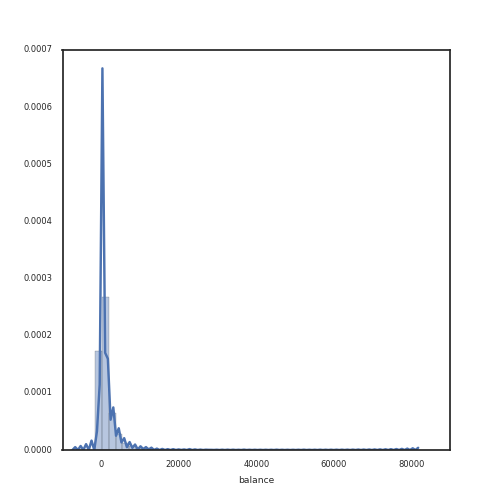

In [10]:
df = df.toPandas()
sns.set(style="white", font_scale=.6)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
g = sns.distplot(df['balance'])
display(fig)

## Heat Map

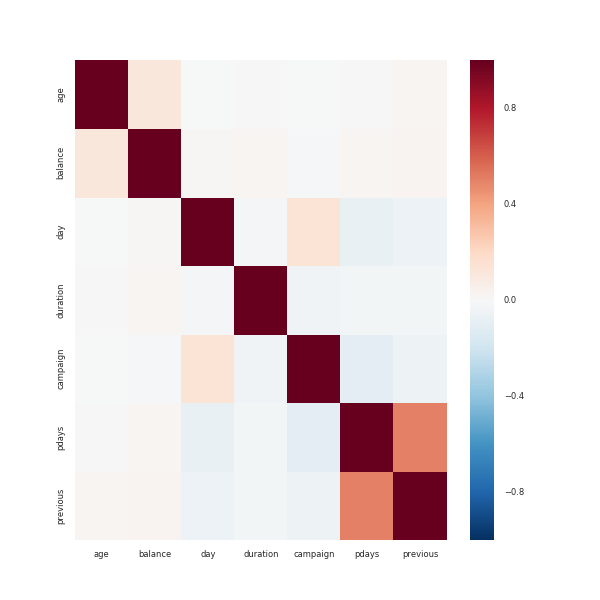

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
corr = df.corr()
sns.heatmap(corr)
display(fig)

In [13]:
df = sqlContext.createDataFrame(df)
pd.DataFrame(df.take(5), columns=df.columns).transpose()

Out[ 7 ]: 
 0 1 2 3 4
age 59 56 41 55 54
job admin. admin. technician services admin.
marital married married married married married
education secondary secondary secondary secondary tertiary
default no no no no no
balance 2343 45 1270 2476 184
housing yes no yes yes no
loan no no no no no
contact unknown unknown unknown unknown unknown
day 5 5 5 5 5
month may may may may may
duration 1042 1467 1389 579 673
campaign 1 1 1 1 2
pdays -1 -1 -1 -1 -1
previous 0 0 0 0 0
poutcome unknown unknown unknown unknown unknown
deposit yes yes yes yes yes

In [14]:
display(df.summary())

summary,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
mean,41.231947679627304,null,null,null,null,1528.5385235620856,null,null,null,15.658036194230425,null,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358,null,null
stddev,11.91336919221553,null,null,null,null,3225.413325946151,null,null,null,8.42073954100645,null,347.1283857163058,2.722077181661486,108.75828197197696,2.2920072186705047,null,null
min,18,admin.,divorced,primary,no,-6847,no,no,cellular,1,apr,2,1,-1,0,failure,no
25%,32,null,null,null,null,122,null,null,null,8,null,138,1,-1,0,null,null
50%,39,null,null,null,null,550,null,null,null,15,null,255,2,-1,0,null,null
75%,49,null,null,null,null,1708,null,null,null,22,null,496,3,20,1,null,null
max,95,unknown,single,unknown,yes,81204,yes,yes,unknown,31,sep,3881,63,854,58,unknown,yes


In [15]:
df = df.drop("day","month","contact","pdays")

In [16]:
df = df.dropna()

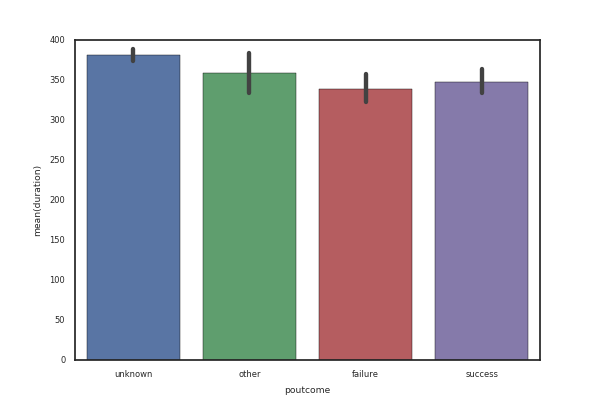

In [17]:
# Bar chart of "previous outcome" Vs "call duration"
df = df.toPandas()
pt = plt.figure(figsize = (6,4))
sns.barplot(x='poutcome', y = 'duration', data = df)
display(pt)

In [18]:
df = sqlContext.createDataFrame(df)
pd.DataFrame(df.take(5), columns=df.columns).transpose()

Out[ 12 ]: 
 0 1 2 3 4
age 59 56 41 55 54
job admin. admin. technician services admin.
marital married married married married married
education secondary secondary secondary secondary tertiary
default no no no no no
balance 2343 45 1270 2476 184
housing yes no yes yes no
loan no no no no no
duration 1042 1467 1389 579 673
campaign 1 1 1 1 2
previous 0 0 0 0 0
poutcome unknown unknown unknown unknown unknown
deposit yes yes yes yes yes

In [19]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

Out[ 13 ]: 
 0 1 2 3 4
summary count mean stddev min max

In [20]:
cols = df.columns

In [21]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'duration', 'campaign', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [22]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols

#### Split the data set for training and testing

In [24]:
train, test = df.randomSplit([0.7, 0.3], seed = 42)

In [25]:
print("Number of training records: " + str(train.count()))
print("Number of testing records : " + str(test.count()))

Number of training records: 7772
Number of testing records : 3390

### Logistic Regression

In [27]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [28]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+------------+-----+--------------------+----------+--------------------+
age| job|label| rawPrediction|prediction| probability|
+---+------------+-----+--------------------+----------+--------------------+
 23|entrepreneur| 1.0|[1.13982899456333...| 0.0|[0.75764824081623...|
 23| services| 1.0|[-1.2201161024084...| 1.0|[0.22791601935131...|
 23| services| 1.0|[-3.2554450910957...| 1.0|[0.03713171784089...|
 25| blue-collar| 1.0|[-0.3563920729875...| 1.0|[0.41183322304732...|
 25| blue-collar| 1.0|[-3.7408100421077...| 1.0|[0.02318458598530...|
 26| admin.| 1.0|[-0.6548518060582...| 1.0|[0.34189702831890...|
 26| blue-collar| 1.0|[-2.4409418149756...| 1.0|[0.08010348528018...|
 26| blue-collar| 1.0|[0.20278771158368...| 0.0|[0.55052390583855...|
 26| blue-collar| 1.0|[-2.2670852317120...| 1.0|[0.09388588208368...|
 26| management| 1.0|[-4.4410974283627...| 1.0|[0.01164577821325...|
+---+------------+-----+--------------------+----------+--------------------+
only showing top 10 rows

In [29]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

('Test Area Under ROC', 0.8751466682274119)

### Decision Tree

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+------------+-----+--------------+----------+--------------------+
age| job|label| rawPrediction|prediction| probability|
+---+------------+-----+--------------+----------+--------------------+
 23|entrepreneur| 1.0|[1146.0,893.0]| 0.0|[0.56204021579205...|
 23| services| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 23| services| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 25| blue-collar| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 25| blue-collar| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 26| admin.| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 26| blue-collar| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 26| blue-collar| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 26| blue-collar| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
 26| management| 1.0|[445.0,1740.0]| 1.0|[0.20366132723112...|
+---+------------+-----+--------------+----------+--------------------+
only showing top 10 rows

In [32]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.705598197339

### Random Forest

In [34]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+------------+-----+--------------------+----------+--------------------+
age| job|label| rawPrediction|prediction| probability|
+---+------------+-----+--------------------+----------+--------------------+
 23|entrepreneur| 1.0|[12.5124561650833...| 0.0|[0.62562280825416...|
 23| services| 1.0|[5.91805388998505...| 1.0|[0.29590269449925...|
 23| services| 1.0|[6.21686696131944...| 1.0|[0.31084334806597...|
 25| blue-collar| 1.0|[6.10196451902857...| 1.0|[0.30509822595142...|
 25| blue-collar| 1.0|[6.24152498306429...| 1.0|[0.31207624915321...|
 26| admin.| 1.0|[6.06205100082840...| 1.0|[0.30310255004142...|
 26| blue-collar| 1.0|[6.31979755410085...| 1.0|[0.31598987770504...|
 26| blue-collar| 1.0|[6.87125352112789...| 1.0|[0.34356267605639...|
 26| blue-collar| 1.0|[5.35842811525093...| 1.0|[0.26792140576254...|
 26| management| 1.0|[5.84296096700758...| 1.0|[0.29214804835037...|
+---+------------+-----+--------------------+----------+--------------------+
only showing top 10 rows

In [35]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.877249841835

In [36]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

Out[ 26 ]: 0.8772498418352129

In [37]:
evaluator.getMetricName()

Out[ 27 ]: 'areaUnderROC'

In [38]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal with 1 for binomial regression, or the number oflasses for multinomial regression. (undefined)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw prediction (a.k.a. confidence) column name. (default: rawPrediction)
regParam: regularization parameter (>= 0). (default: 0.0)
standardization: whether to standardize the training features before fitting the model. (default: True)
threshold: Threshold in binary classification prediction, in range [0, 1]. If threshold and thresholds are both set, they must match.e.g. if threshold is p, then thresholds must be equal to [1-p, p]. (default: 0.5)
thresholds: Thresholds in multi-class classification to adjust the probability of predicting each class. Array must have length equal to the number of classes, with values > 0, excepting that at most one value may be 0. The class with largest value p/t is predicted, where p is the original probability of that class and t is the class's threshold. (undefined)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 1e-06)
upperBoundsOnCoefficients: The upper bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
upperBoundsOnIntercepts: The upper bounds on intercepts if fitting under bound constrained optimization. The bound vector size must be equal with 1 for binomial regression, or the number of classes for multinomial regression. (undefined)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)

### Implementing Param Grid and CrossValidator

In [40]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

In [41]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

### Evaluate model

In [43]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rfBest = cvModel.bestModel
# Model quality
predictions = rfBest.transform(test)
evaluatorRF = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorRF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.795575
Test Error = 0.204425

In [44]:
# Print the coefficients and intercept 
print("Coefficients: %s" % str(rfBest.coefficients))
print("Intercept: %s" % str(rfBest.intercept))

Coefficients: [-0.169810291206,-0.393811733821,-0.165404259107,0.0809030050758,-0.258720834438,0.747041428734,-0.427691880478,0.794285074603,-0.072310328412,-0.445418014505,-0.327176812879,-0.226754460116,-0.0343499424676,-0.201377974003,0.116735328033,-0.349298122637,-0.575323717652,0.904184948574,0.370883795676,-0.960626471306,-0.224970453467,1.76347877543,-0.00986432870786,3.07294870815e-05,0.00414002336354,-0.104392879079,-0.00170926590977]
Intercept: -0.244027725659

## View the results of the best model

In [46]:
correct = predictions.where("(label = prediction)").count()
incorrect = predictions.where("(label != prediction)").count()

resultDF = sqlContext.createDataFrame([['correct', correct], ['incorrect', incorrect]], ['metric', 'value'])
display(resultDF)

metric,value
correct,2697
incorrect,693


### Results

* Thus, by implementing Random Forest we were able to achieve area under ROC of 87.72% with an accuracy of 79.55% and error of 20.44%.
* Random forest classifier can handle the missing values and maintain the accuracy of a large proportion of data.
* If incase there are more trees, it does not allow overfitting trees in the model.
* It can also handle a large data set with higher dimensionality.
* Cross Validation was used for parameter selection.